In [1]:
import pandas as pd
from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('processed_data.csv')
print(df.shape)
# print(df.columns)
df['zip_code'] = df['zip_code'].astype('object')
# print(df.value_counts())
# print(df.dtypes)

(331455, 30)


In [3]:
print(df.shape)
print(df['intime'].value_counts())

(331455, 30)
1    180092
0    151363
Name: intime, dtype: int64


In [4]:
data = pd.get_dummies(df)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [5]:
feature_cols =data.columns.drop('intime')
data[feature_cols].shape

(331455, 397)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.intime))
# n_splits number of reshuffling max 10

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'intime']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'intime']

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(265164, 397)
(265164,)
(66291, 397)
(66291,)


In [8]:
# Create and train an XGBoost classifier
mBoost = XGBClassifier()
mBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
# Make predictions on the test set
y_pred = mBoost.predict(X_test)

In [10]:
# # Get the feature importances
# importances = mBoost.feature_importances_

# # Get the indices of the top 20 most important features
# top_20 = importances.argsort()[-20:][::-1]

# # Plot the top 20 most important features
# plt.barh(X_train.columns[top_20], importances[top_20])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

In [11]:
from sklearn.utils import resample

# Train XGBoost model
mBoost = XGBClassifier()
mBoost.fit(X_train, y_train)


# Get feature importance scores
scores = mBoost.feature_importances_

In [12]:
# print(scores)

In [13]:
# Calculate standard errors using bootstrap
n_iterations = 1000
n_size = int(len(X_train) * 0.50)
coefs = np.zeros((n_iterations, X_train.shape[1]))
for i in range(n_iterations):
    print(f"iteration:{i}")
    X_sample, y_sample = resample(X_train, y_train, n_samples=n_size)
    model = XGBClassifier()
    model.fit(X_sample, y_sample)
    coefs[i] = model.feature_importances_
se = np.std(coefs, axis=0)

# Sort the coefficients by magnitude
indices = np.argsort(np.abs(scores))[::-1]
# print(indices)

# Get the feature names from the column names of the DataFrame
feature_names = list(X_train.columns)

iteration:0
iteration:1
iteration:2
iteration:3
iteration:4
iteration:5
iteration:6
iteration:7
iteration:8
iteration:9
iteration:10
iteration:11
iteration:12
iteration:13
iteration:14
iteration:15
iteration:16
iteration:17
iteration:18
iteration:19
iteration:20
iteration:21
iteration:22
iteration:23
iteration:24
iteration:25
iteration:26
iteration:27
iteration:28
iteration:29
iteration:30
iteration:31
iteration:32
iteration:33
iteration:34
iteration:35
iteration:36
iteration:37
iteration:38
iteration:39
iteration:40
iteration:41
iteration:42
iteration:43
iteration:44
iteration:45
iteration:46
iteration:47
iteration:48
iteration:49
iteration:50
iteration:51
iteration:52
iteration:53
iteration:54
iteration:55
iteration:56
iteration:57
iteration:58
iteration:59
iteration:60
iteration:61
iteration:62
iteration:63
iteration:64
iteration:65
iteration:66
iteration:67
iteration:68
iteration:69
iteration:70
iteration:71
iteration:72
iteration:73
iteration:74
iteration:75
iteration:76
iteration

In [21]:
print(indices[:30])

[ 48 112  87   2 237  28  62 164 148  91 238 376 173  88 230 391 234 239
 181 383  46 117 135 235 396  97  49 365 177 393]


In [24]:
print(indices[:30])
feature_names[48] = "I: Bulky trash r."
feature_names[112] = "I: Mosquito insp." 
feature_names[87] = "I: Garbage C." 
feature_names[2] = "Goal days"
feature_names[237] = "O: RAAM 27-93" 
feature_names[28] = "I: Abondened S. carts"
feature_names[62] = "I: Unauth. Com. Veh."
feature_names[164] = "I: Solid Waste a." 
feature_names[148] = "I: Sidewalk broken"
feature_names[91] = "I: Green waste cart r."
feature_names[238] = "0: Reg. & Econ r."
feature_names[376] = "M: xterface"
feature_names[173] = "I: Community cats"
feature_names[88] = "I: Garbage pending"
feature_names[230] = "0: Citations & Tags"
feature_names[391] = "June" 
feature_names[234] = "0: Road & Bridges 16-60" 
feature_names[239] = "0: Solid Waste m." 
feature_names[181] = "I: Street sign"
feature_names[383] = "P: Standard"
feature_names[46] = "I: Bulky trash c."
feature_names[117] = "I: Overgrowth-median"
feature_names[135] = "I: Recycling c."
feature_names[235] = "I: Traff. Eng. 10-60"
feature_names[396] = "Sep"
feature_names[97] = "I:Illegal dumping"
feature_names[49] = "I: Bulky trash u."
feature_names[365] = "M: inhouse"
feature_names[177] = "I: Traffic sign"
feature_names[393] = "May"
# "I: Pet account u."
# "I: Lost pet"
# "Iss.: ASU police a."
# "I: Dog tag c."
# "I: Work w/o permit"
# "I: Speed humps"
# "I: Traffic study"
# "O: Enf. Sec. 3-36"
# "I: Injured animal"
# "I: New Sign-4way"
# "I: Certificate of use"
# "I: License app."

[ 48 112  87   2 237  28  62 164 148  91 238 376 173  88 230 391 234 239
 181 383  46 117 135 235 396  97  49 365 177 393]


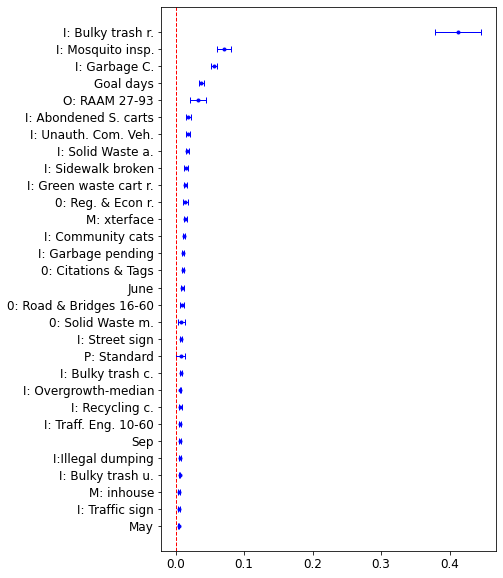

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.errorbar(scores[indices[:30]], range(29,-1,-1), xerr=se[indices[:30]], fmt='o', color='blue', ecolor='blue', markersize=3, capsize=3, elinewidth=1,markeredgewidth=1)
plt.yticks(range(29,-1,-1), [feature_names[i] for i in indices[:30]],fontsize=12)
plt.xticks(fontsize=12)

# Add vertical line at x=0
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.gcf().set_figheight(10)

# plt.show()

plt.savefig("figs/coef_xgboost.pdf", format="pdf", bbox_inches="tight")

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Make predictions on the test set
y_pred = mBoost.predict(X_test)

# Calculate the accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy,3)}')
print(f"Precision = {round(precision,3)}")
print(f"Recall = {round(recall,3)}")
print(f"F1 Score = {round(f1score,3)}")

Accuracy: 0.837
Precision = 0.873
Recall = 0.819
F1 Score = 0.845


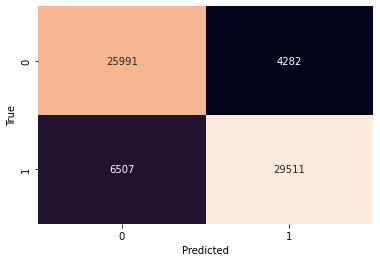

In [26]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred, labels=[1, 2])

# Create a DataFrame from the confusion matrix
# cm_df = pd.DataFrame(cm, index=[1, 2], columns=[1, 2])

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()
plt.savefig("figs/confusion_gboost.pdf", format="pdf", bbox_inches="tight")